1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
df=sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

few visualizations

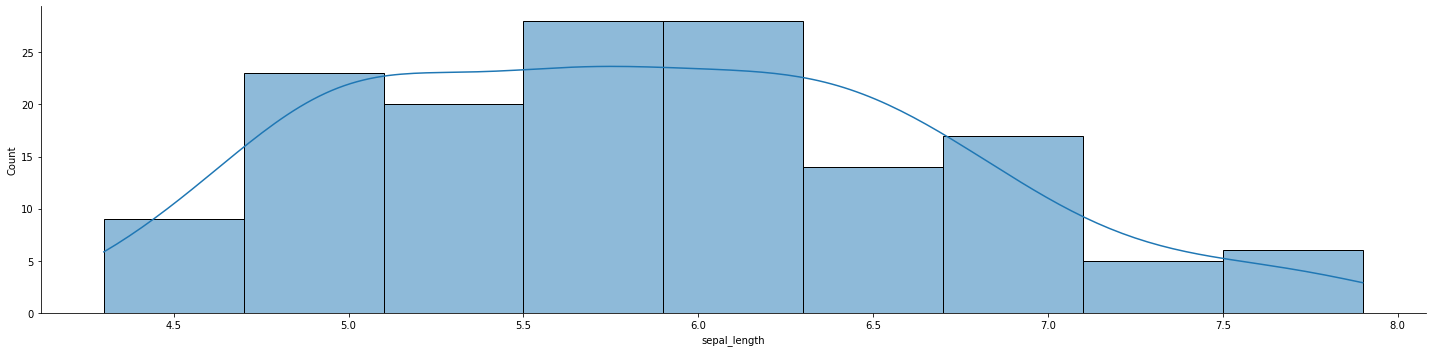

In [8]:
sns.displot(df['sepal_length'],kde=True, aspect=4)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

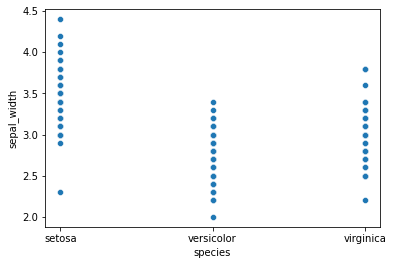

In [9]:
sns.scatterplot(x='species',y='sepal_width',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

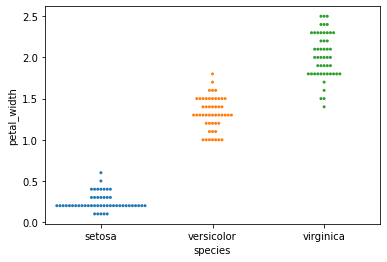

In [10]:
sns.swarmplot(x='species',y='petal_width',dodge=True, size=3,data=df)

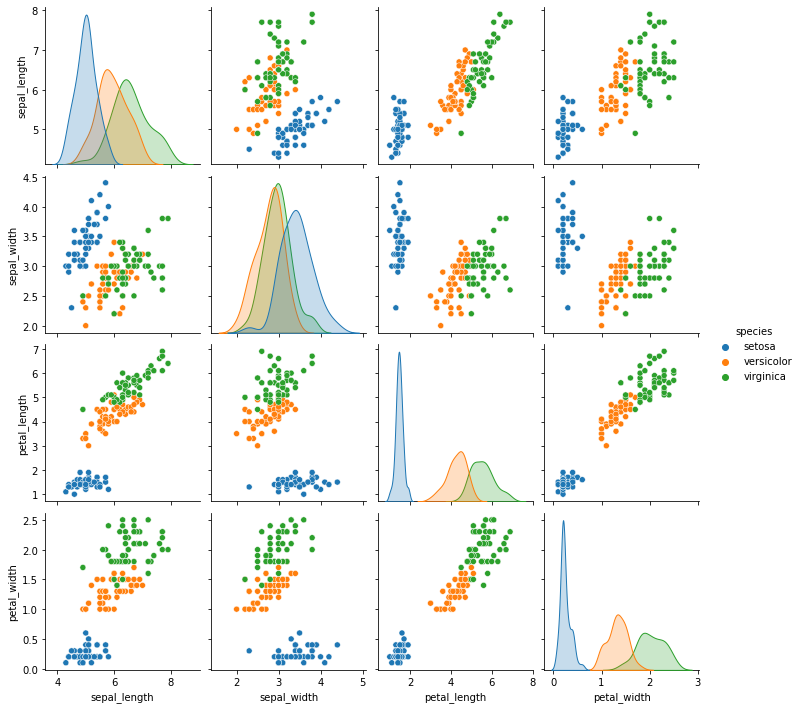

In [11]:
sns.pairplot(data=df, hue='species')
plt.show()

The below correlation matrix helps us understand how the feature are correlated to each other. Here we can see that petal_length and petal_width are highly correlated, where as sepal width and sepal lenght are weakly correlated

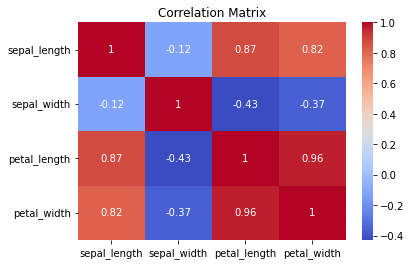

In [12]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [13]:
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Training and testing split (80:20) along with application of Naive Bayes algorithm to make prediction

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# Fit the Naive Bayes classifier to the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

In [15]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object

In [16]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

From above 2 cells we can observe that the y_test and the correspondant y_pred are both the same.

In [17]:
# Assuming cm is the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

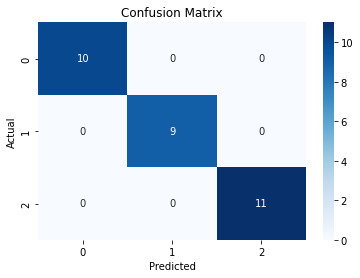

In [18]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Compute the evaluation metrics
n_classes = len(set(y_test))
tp = [0] * n_classes
fp = [0] * n_classes
fn = [0] * n_classes
for i in range(n_classes):
    tp[i] = cm[i, i]
    fp[i] = sum(cm[:, i]) - tp[i]
    fn[i] = sum(cm[i, :]) - tp[i]

tn = []
for i in range(n_classes):
    temp = cm.sum() - tp[i] - fp[i] - fn[i]
    tn.append(temp)

print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')


TP: [10, 9, 11], FP: [0, 0, 0], TN: [20, 21, 19], FN: [0, 0, 0]


In [20]:
accuracy = sum(tp) / sum(cm.flatten())
error_rate = 1 - accuracy
precision = [0] * n_classes
recall = [0] * n_classes
for i in range(n_classes):
    if tp[i] + fp[i] > 0:
        precision[i] = tp[i] / (tp[i] + fp[i])
    if tp[i] + fn[i] > 0:
        recall[i] = tp[i] / (tp[i] + fn[i])
        
print(f'Accuracy: {accuracy:.2f}')
print(f'Error rate: {error_rate:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 1.00
Error rate: 0.00
Precision: [1.0, 1.0, 1.0]
Recall: [1.0, 1.0, 1.0]


For the above model 100% accuracy is observed with 0% error rate.

Prediction for a random new data point

In [21]:
# Predict the class of a new data point
new_data_point = [[5.1, 3.5, 1.4, 0.2]]  # Features of the new data point
predicted_class = nb.predict(new_data_point)

print(f'Predicted class: {predicted_class[0]}')

Predicted class: setosa


C:\Users\meenu\anaconda32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
